In [1]:
import causaltensor as ct
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from causaltensor.sample_data import fetch

In [3]:
O_raw = fetch()

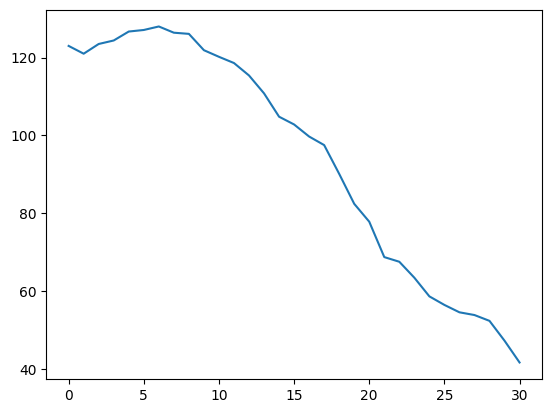

In [4]:
O = O_raw[8:, :]
O = O.T
plt.plot(O[-1, :])

In [5]:
Z = np.zeros_like(O)
Z[-1, 19:] = 1 #start to apply the treatment in 1989

In [6]:
s = np.linalg.svd(O, full_matrices=False, compute_uv=False)

## DID estimation

In [7]:
from causaltensor.cauest import DID 

M, tau = DID(O, Z)

In [8]:
tau

-27.335107556961784

## SDID estimation

In [9]:
from causaltensor.cauest import SDID

tau = SDID(O, Z)

In [10]:
tau

-15.602326126984645

## Matrix Completion

In [11]:
from causaltensor.cauest import MC_NNM_with_suggested_rank

M, a, b, tau = MC_NNM_with_suggested_rank(O, 1-Z, suggest_r = 1)

In [12]:
tau

-27.017712092108138

In [13]:
from causaltensor.cauest import MC_NNM_with_cross_validation

M, a, b, tau = MC_NNM_with_cross_validation(O, 1-Z)
tau

-19.936496012119093

## Debiased Convex Panel Regression

In [14]:
import causaltensor.cauest.DebiasConvex as DebiasConvex
import causaltensor.matlib.util as util

from importlib import reload
reload(DebiasConvex)
reload(util)
M, tau, std = DebiasConvex.DC_PR_with_suggested_rank(O, Z, suggest_r = 2)
#M, tau, variance = 
#M, tau, M_raw, tau_raw = DC_PR_auto_rank(O, Z)
#variance = std_debiased_convex(O, Z, M_raw, tau_raw)
#print(tau, variance)

In [17]:
M, tau, std = DebiasConvex.DC_PR_auto_rank(O, Z, method = 'non-convex')
print(tau, std)

-15.880704119035322 3.011813924289418


In [19]:
M, tau, std = DebiasConvex.DC_PR_auto_rank(O, Z, method = 'auto')
print(tau, std)

-15.880704119035322 3.011813924289418


In [35]:
from causaltensor.cauest import DC_PR_with_suggested_rank
from causaltensor.cauest import non_convex_algorithm
from causaltensor.cauest import std_debiased_convex
from causaltensor.cauest import DC_PR_auto_rank




#M, tau, M_raw, tau_raw = DC_PR_with_suggested_rank(O, Z, suggest_r = 2)
M, tau, std = DC_PR_auto_rank(O, Z)
print(tau, std)

-16.010577370658766 3.01302063854069
